# Лабораторная работа №1
## Выполнил студент группы БСТ1903 Минаков Л.А.
### Задание №1
1. Создать Jupyter Notebook со следующим наименованием: Lab1_Группа_ФИО
2. Создать новую ячейку с помощью кнопки
3. В созданной ячейке по указанной ниже форме заполните оглавление файла,
заменив наименование группы и вписав свое ФИО,
Рисунок 1 - Форма оглавления файла в ячейке
после чего создайте еще одну ячейку и напишите следующий код:
4. С помощью кнопки запустите выполнение всех ячеек.
5. После выполнения у вас должна отформатироваться ячейка с оглавлением и
должен выполниться “Hello, World!” 

In [11]:
print("Hello, world!")

Hello, world!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры m, n, min_limit, max_limit, где m и n указывают размер
матрицы, а min_lim и max_lim - минимальное и максимальное значение для
генерируемого числа . По умолчанию при отсутствии параметров принимать следующие
значения:
m = 50
n = 50
min_limit = -250
max_limit = 1000 + (номер своего варианта)

In [12]:
import random
import numpy
import time
def generateRndMatrix(m = 50, n = 50, min_limit = -250, max_limit = 1009):
    # m, n - число строк и столбцов матрицы
    # min_limit, max_limit - минимальное и максимальное значение случайного числа
    matrix = numpy.empty((m, n))
    for i in range(m):
        for j in range(n):
            matrix[i][j] = random.randint(min_limit, max_limit)
    return matrix.astype(int)

### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.
Методы:
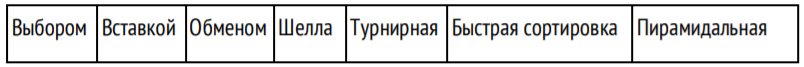

In [13]:
# Сортировка выбором
def selection_sort(matrix):
    for row in matrix:
        for i in range(len(row)):
            smallest = i
            for j in range(i + 1, len(row)):
                if row[j] < row[smallest]:
                    smallest = j
            row[i], row[smallest] = row[smallest], row[i]

In [14]:
#Сортировка вставкой
def insertion_sort(matrix):
    for row in matrix:
        for i in range(len(row)):
            j = i - 1 
            key = row[i]
            while row[j] > key and j >= 0:
                row[j + 1] = row[j]
                j -= 1
                row[j + 1] = key
    return matrix 

In [15]:
#Сортировка обменом
def bubble_sort(matrix):
    for row in matrix:
        i, size = 1, len(row)
        while i < size:
            if row[i - 1] > row[i]:
                row[i - 1], row[i] = row[i], row[i - 1]
                i = 1
            else:
                i += 1
    return matrix

In [16]:
#Сортировка Шелла
"""
Тут были трудности с передачей всего двумерного массива, поэтому вызывать данную функцию
нужно в цикле, а-ля: 
for row in matrix:
    shell_sort(row)
"""
def shell_sort(arr):
    last_index = len(arr) - 1
    step = len(arr) // 2
    while step > 0:
        for i in range(step, last_index + 1, 1):
            j = i
            delta = j - step
            while delta >= 0 and arr[delta] > arr[j]:
                arr[delta], arr[j] = arr[j], arr[delta]
                j = delta
                delta = j - step
        step //= 2

In [17]:
#Турнирная сортировка
"""
Тут действовать будем так же, как и в сортировке Шелла
"""
def tournament_sort(arr):
    tree = [None] * 2 * (len(arr) + len(arr) % 2)
    index = len(tree) - len(arr) - len(arr) % 2
    
    for i, v in enumerate(arr):
        tree[index + i] = (i, v)
    
    for j in range(len(arr)):
        n = len(arr)
        index = len(tree) - len(arr) - len(arr) % 2
        while index > -1:
            n = (n + 1) // 2
            for i in range(n):
                i = max(index + i * 2, 1) # на последней итерация index + i * 2 = 0
                if tree[i] != None and tree[i + 1] != None:
                    if tree[i][1] < tree[i + 1][1]:
                        tree[i // 2] = tree[i]
                    else:
                        tree[i // 2] = tree[i + 1]
                else:
                    tree[i // 2] = tree[i] if tree[i] != None else tree[i + 1]
            index -= n

        index, x = tree[0]
        arr[j] = x
        tree[len(tree) - len(arr) - len(arr) % 2 + index] = None

In [18]:
#Быстрая сортировка
"""
Тут действовать будем так же, как и в сортировке Шелла
"""
def partition(arr, low, high):
    pivot = arr[(low + high) // 2]
    i = low - 1
    j = high + 1
    while True:
        i += 1
        while arr[i] < pivot:
            i += 1
        j -= 1
        while arr[j] > pivot:
            j -= 1
        if i >= j:
            return j
        arr[i], arr[j] = arr[j], arr[i]
def quick_sort(arr):  
    def _quick_sort(items, low, high):
        if low < high:
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)
    _quick_sort(arr, 0, len(arr) - 1)

In [19]:
#Пирамидальная сортировка
"""
Тут действовать будем так же, как и в сортировке Шелла
"""
def heapify(nums, heap_size, root_index):  
    largest = root_index
    left_child = (2 * root_index) + 1
    right_child = (2 * root_index) + 2
    if left_child < heap_size and nums[left_child] > nums[largest]:
        largest = left_child
    if right_child < heap_size and nums[right_child] > nums[largest]:
        largest = right_child
    if largest != root_index:
        nums[root_index], nums[largest] = nums[largest], nums[root_index]
        heapify(nums, heap_size, largest)
def heap_sort(nums):  
    n = len(nums)
    for i in range(n, -1, -1):
        heapify(nums, n, i)
    for i in range(n - 1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0)

In [20]:
GenMatrix = generateRndMatrix()

#Стандартная сортировка
Copy_GenMatrix = GenMatrix.copy()
timerStart = time.perf_counter()
for row in Copy_GenMatrix:
    sorted(row)
timerEnd = time.perf_counter()
time_taken = timerEnd - timerStart
print("Стандартная сортировка:", time_taken)

#Сортировка выбором
Copy_GenMatrix = GenMatrix.copy()
timerStart = time.perf_counter()
selection_sort(Copy_GenMatrix)
timerEnd = time.perf_counter()
time_taken = timerEnd - timerStart
print("Сортировка выбором:", time_taken)

#Сортировка вставкой
Copy_GenMatrix = GenMatrix.copy()
timerStart = time.perf_counter()
insertion_sort(Copy_GenMatrix)
timerEnd = time.perf_counter()
time_taken = timerEnd - timerStart
print("Сортировка вставкой:", time_taken)

#Сортировка обменом
Copy_GenMatrix = GenMatrix.copy()
timerStart = time.perf_counter()
bubble_sort(Copy_GenMatrix)
timerEnd = time.perf_counter()
time_taken = timerEnd - timerStart
print("Сортировка обменом:", time_taken)

#Сортировка Шелла
Copy_GenMatrix = GenMatrix.copy()
timerStart = time.perf_counter()
for row in Copy_GenMatrix:
    shell_sort(row)
timerEnd = time.perf_counter()
time_taken = timerEnd - timerStart
print("Сортировка Шелла:", time_taken)

#Турнирная сортировка
Copy_GenMatrix = GenMatrix.copy()
timerStart = time.perf_counter()
for row in Copy_GenMatrix:
    tournament_sort(row)
timerEnd = time.perf_counter()
time_taken = timerEnd - timerStart
print("Турнирная cортировка:", time_taken)

#Быстрая сортировка
Copy_GenMatrix = GenMatrix.copy()
timerStart = time.perf_counter()
for row in Copy_GenMatrix:
    quick_sort(row)
timerEnd = time.perf_counter()
time_taken = timerEnd - timerStart
print("Быстрая сортировка:", time_taken)

#Пирамидальная сортировка
Copy_GenMatrix = GenMatrix.copy()
timerStart = time.perf_counter()
for row in Copy_GenMatrix:
    heap_sort(row)
timerEnd = time.perf_counter()
time_taken = timerEnd - timerStart
print("Пирамидальная сортировка:", time_taken)

Стандартная сортировка: 0.0008591999999225663
Сортировка выбором: 0.03474200000005112
Сортировка вставкой: 0.029830399999809742
Сортировка обменом: 0.5297167999999601
Сортировка Шелла: 0.01770089999990887
Турнирная cортировка: 0.12945080000008602
Быстрая сортировка: 0.013011600000027101
Пирамидальная сортировка: 0.027151400000093417


### Задание №4
Создать публичный репозиторий на github, и запушить выполненное задание в
.ipynb формате.

https://github.com/levmnkv/data_structures_and_algorithms

## Вывод
В данной лабораторной работе были получены теоретические и практические навыки написания сортировок.